Teoretiska frågor 

1. Relationsdatabas organiserar data i tabeller som består av rader och kolumner.
Varje tabell representerar en specifik typ av information, tex. kunder eller produkter.
För att skapa kopplingar mellan tabeller används primärnycklar och främmande nycklar. 
Denna struktur gör det möjligt att lagra data på ett organiserat sätt och minska redudans. 
Relationsbaser använder SQL för att hantera och hämta när dudata.
2. CRUD = Create, Read, Update, Delete. 
är en akronym för fyra grundläggande operationer som används för att hantera data i en databas. Skapa ny data tex. ny rad i en tabell.
Hämta/läsa data från databasen
    Ändra befintlig data
    Ta bort från databasen
CRUD flödet är en central del i av hur applikationer intregrerar med databaser. 
3. Left join (såkallad yttre) returnerar alla poster från den västra tabellen och de matchande posterna från den högra tabellen. 
Inner join returnerar alla poster som har matchande värden i båda tabeller. 
Vad dessa joins gör är att de anger hur SQL ska använda data från tabell för att välja rader i en annan tabell.
Genom kopplingar kan du hämta data från två eller flera tabeller baserat på logiska relationer mellan tabellerna. 
4. Indexering i SQL innebär att du snabbare får upp sökningar och filtreringar av data i tabeller utan att behöva söka igenom hela tabellen.
Det skapas alltså pekare till var datan lagras i databasen.
5. Vy är en tabell vars innehåll bestäms av "query" och är användbart för att transportera data och tillgänglig göra den tillrättalagda datan. 
Det är användbart även när du vill veta att alla tabeller använder samma definitoner/resultat, 
genom att skapa en tabell istället för manuell kod att ta fram data och så sätt centralisera definitoner/resultat.
6. Lagrad procedur är lagrad eller sparad kod som kan återanvändas och möjliggör t.ex. centraliserade definitoner.
Genom att använda det får man konsistenta resultat och kan säkerställa att gemensamma definitoner används.
Det underlättar även då man inte behöver skriva om koden från lagrade procedurer varje gång.
Lagrade procedurer kan ha parametrar så användare kan nyttja styrande logik beroende på önskade resultat. 

In [7]:
from sqlalchemy import create_engine, URL
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm

In [9]:
# Server och databasinfo
SERVER = 'localhost' #Ansluter till lokal server
DATABASE = 'Adventureworks2022'

#Skapa connection string och anslutningsobjekt
connection_string = (
     "DRIVER={ODBC Driver 18 for SQL Server};"
f"SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no"
)
connection_url = URL.create(
    "mssql+pyodbc", query={"odbc_connect": connection_string}
    )

engine = create_engine(connection_url) #engine är anslutningsobjektet vi använder för att kommunicera med databasen.
# SQL-fråga

#Listar alla scheman som har tabell kopplad till sig för att se vilka scheman vi har
query = """
SELECT DISTINCT A.name,
A.schema_id
FROM sys.[schemas] AS A
INNER JOIN sys.[tables] AS B
ON A.schema_id = B.schema_id
WHERE A.schema_id <1000 
AND A.name NOT IN ('dbo', 'sys');
"""

#Skapar en Dataframe med resultaten av queryn. 
ad_schemas_df = pd.read_sql_query(query, engine) 

#Visa resultat
print(ad_schemas_df)

             name  schema_id
0  HumanResources          5
1          Person          6
2      Production          7
3      Purchasing          8
4           Sales          9


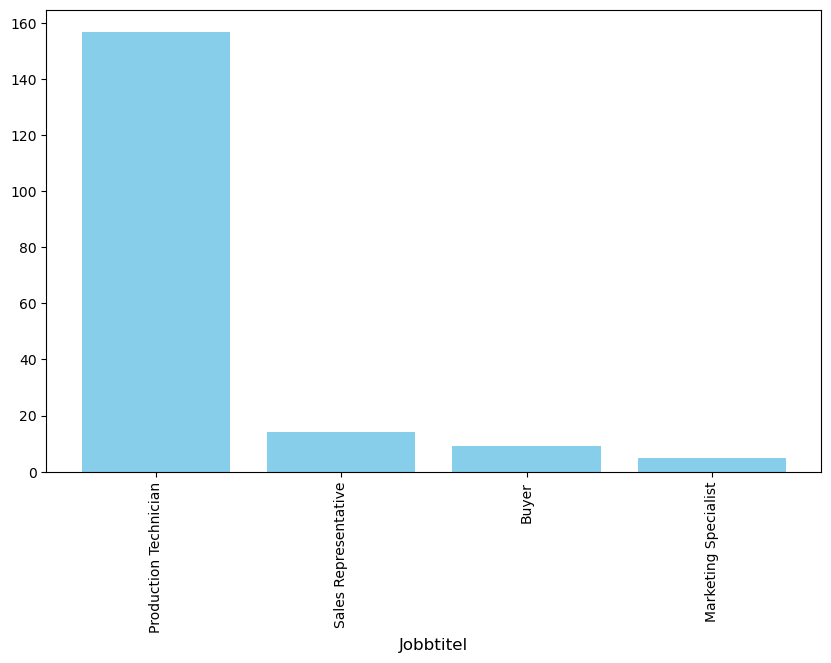

In [11]:
# Uppgift 1: 
#Anställda per jobbtitel
data_jobs = {
    'JobTitle': ['Production Technician', 'Sales Representative', 'Buyer', 'Marketing Specialist'],
    'nbr' : [157, 14, 9, 5]
}
job_df = pd.DataFrame(data_jobs)

query_jobs = """ 
SELECT JobTitle, COUNT (*) AS nbr
FROM HumanResources.Employee
GROUP BY JobTitle
ORDER BY nbr DESC;
"""
data_jobs = pd.read_sql_query(query_jobs, engine)

#Visualisering av anställda per jobbtitel
plt.figure(figsize=(10,6))
plt.bar(job_df['JobTitle'], job_df['nbr'], color='skyblue')
plt.xlabel('Jobbtitel', fontsize=12)
plt.xticks(rotation=90)
plt.show()

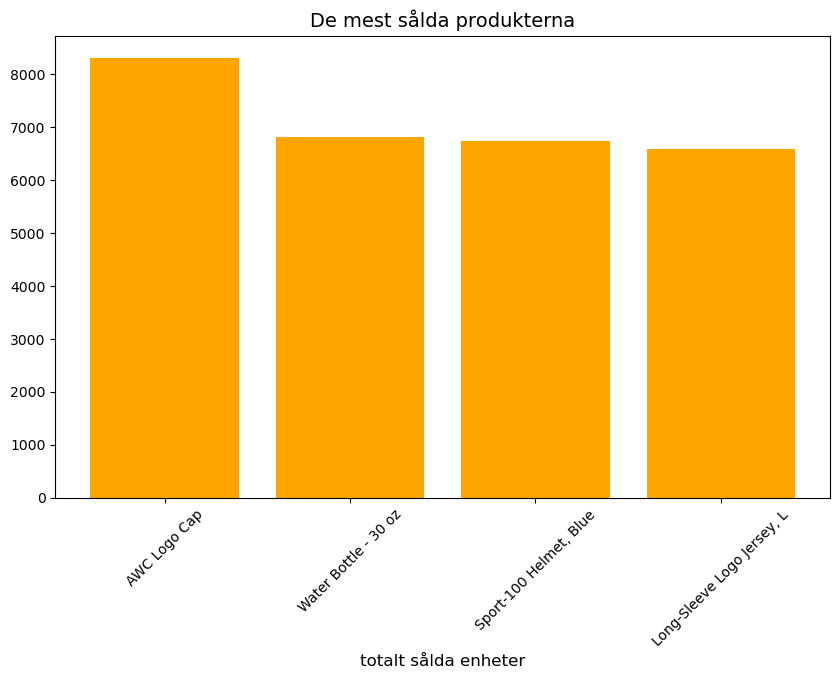

In [13]:
#De mest sålda produkterna (fråga 2)
data_products = {
    'ProductName': ['AWC Logo Cap', 'Water Bottle - 30 oz', 'Sport-100 Helmet, Blue', 'Long-Sleeve Logo Jersey, L'],
    'TotalSold': [8311, 6815, 6743, 6592]
}
product_df = pd.DataFrame(data_products)

query_products = """
SELECT p.ProductID, p.name AS ProductName, SUM(od.OrderQty) AS TotalSold
FROM AdventureWorks2022.Production.Product p
JOIN AdventureWorks2022.Sales.SalesOrderDetail od ON p.ProductID = od.ProductID
GROUP BY p.ProductID, p.Name
ORDER BY TotalSold DESC;
"""
data_products = pd.read_sql_query(query_products, engine)

#Visualisering av försäljning av de mest sålda produkterna
plt.figure(figsize=(10, 6))
plt.bar(product_df['ProductName'], product_df['TotalSold'], color='orange')
plt.title('De mest sålda produkterna', fontsize=14)
plt.xlabel('Produkt', fontsize=12)
plt.xlabel('totalt sålda enheter', fontsize=12)
plt.xticks(rotation=45)
plt.show()

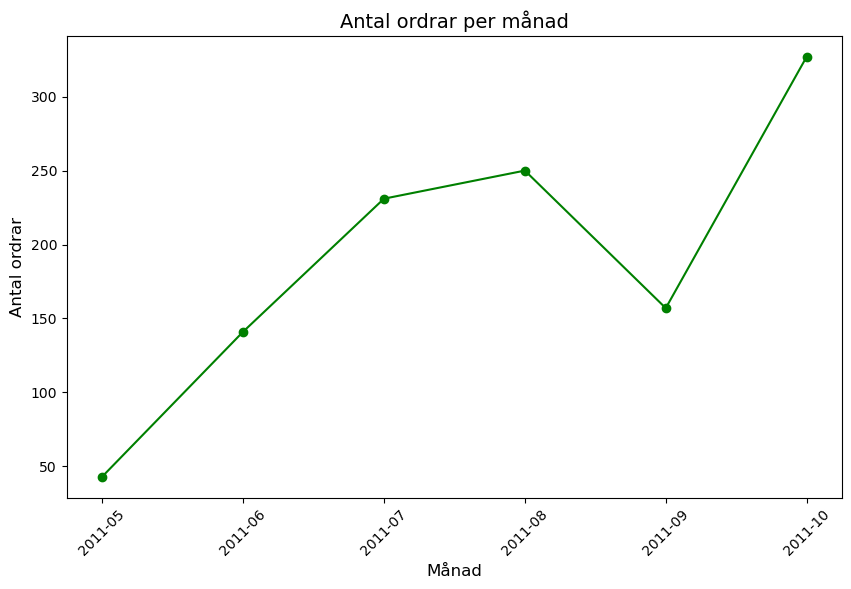

In [15]:
#Antal ordrar per månad (fråga 3)
data_orders = {
    'YearMonth': ['2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10'],
    'Orders': [43, 141, 231, 250, 157, 327]
}
orders_df = pd.DataFrame(data_orders)

query_sales = """
SELECT YEAR(OrderDate) AS Year, MONTH(OrderDate) AS Month, COUNT(SalesOrderID) AS TotalOrders
FROM Sales.SalesOrderHeader
WHERE YEAR(OrderDate) = 2011
GROUP BY YEAR(OrderDate), MONTH(OrderDate)
ORDER BY Year, Month;
"""
data_sales = pd.read_sql_query(query_sales, engine)

#Visualisering av antal ordrar per månad
plt.figure(figsize=(10, 6))
plt.plot(orders_df['YearMonth'], orders_df['Orders'], marker='o', linestyle='-', color='green')
plt.title('Antal ordrar per månad', fontsize=14)
plt.xlabel('Månad', fontsize=12)
plt.ylabel('Antal ordrar', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Medelvärde: 200.88
Konfidensintervall (95%): (141.5841370563487, 260.1658629436513)


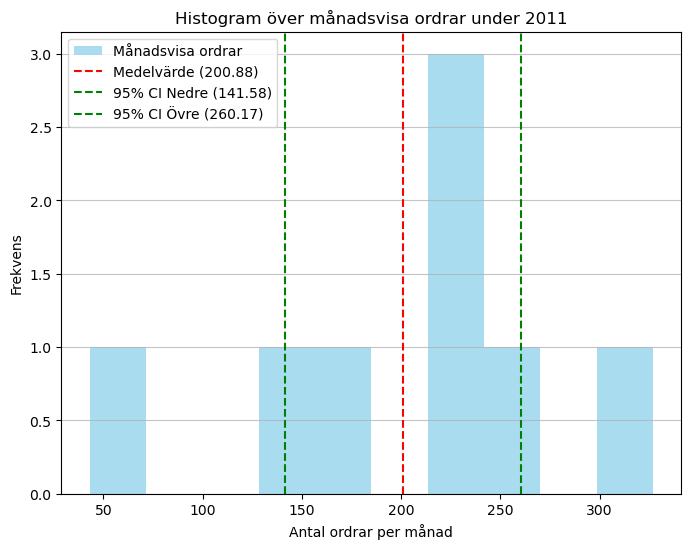

In [17]:
#Uppgift 2:
#Antal ordrar per månad
monthly_orders = [43, 141, 231, 250, 157, 327, 230, 228]
#beräkning av medelvärde och standardavvikelse
mean_orders = np.mean(monthly_orders)
std_orders = np.std(monthly_orders, ddof=1)

#Konfidensintervall (95%)
n = len(monthly_orders)
ci = norm.interval(0.95, loc=mean_orders, scale=std_orders/np.sqrt(n))
#Utskrift
print(f"Medelvärde: {mean_orders:.2f}")
print(f"Konfidensintervall (95%): {ci}")

#Visualisering av konfidensintervallet
plt.figure(figsize=(8, 6))
plt.hist(monthly_orders, bins=10, color='skyblue', alpha=0.7, label='Månadsvisa ordrar')
plt.axvline(mean_orders, color='red', linestyle='--', label=f'Medelvärde ({mean_orders:.2f})')
plt.axvline(ci[0], color='green', linestyle='--', label=f'95% CI Nedre ({ci[0]:.2f})')
plt.axvline(ci[1], color='green', linestyle='--', label=f'95% CI Övre ({ci[1]:.2f})')
plt.title('Histogram över månadsvisa ordrar under 2011')
plt.xlabel('Antal ordrar per månad')
plt.ylabel('Frekvens')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

Slutsatser och rekommendationer

1. Flest anställda har vi på Produktion, vilket indikterar ett produktionsfokus. Det kan vara värt att undersöka om det är optimalt med så många anställda, i förhållande till produktionsvolymer. Det kan finnas potential för förbättringar. 
2. De flest sålda produkterna är, på första plats AWC Logo Cap och andra plats Water Bottle. Vill man öka försäljningen kan man marknadsföra ytterligare genom tex sociala medier, eller inkludera kampanjer och rabatter. 
3. Genomsnittlig försäljning per månad är stabil, men jag rekommenderar att undersöka när försäljningen går sämre och ändra strategi så att försäljningen ökar under den perioden. Rätt undersökning och marknadsföring kan hjälpa att öka försäljningen. 

Utvärdering:
Det var lite utmanande i början att anpassa mig då jag är van vid andra språk och verktyg men efter att ha suttit ned med det i x antal timmar är jag nu mer självsäker och nöjd med min insats. 
Jag tycker att jag förtjänar minst ett G i betyg då jag besvarat frågorna och utfört uppgiften enligt instruktionerna därmed uppfyllt kraven. 
Tips jag hade gett till mig själv i början av kursen: våga göra fler misstag, inte haka upp sig på ett problem - sök istället alternativa lösningar. 